Author: Ivan Bongiorni

Repository: 

# Study of scaling transformation

The scaling transformation I applied for this project follows to steps:

1. Apply `y = log( x + 1 )`.
2. Min-max scale the result between 0 and its 99th percentile.

Since language subgroups differ significantly in scale, the first version of muy custom scaling function was applied on each of these subgroups. Now I have simplified data preprocessing treatin the whole dataset as one block of data. A scaling dictionary with the total 99th log-percentile is saved to `/data_processed/` folder during the execution of processing pipeline.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn

# Local modules
import tools

In [2]:
# Load raw data
X = pd.read_csv('data_raw/train_2.csv') 
print(X.shape)
X.head() 

(145063, 804)


,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0


In [3]:
X['language'] = [ tools.process_url(url) for url in X['Page'].tolist() ] 

language = X['language'] 

In [4]:
# Drop URL string and convert to numpy array
X = X.drop(['Page', 'language'], axis = 1).values

## Visualize whole dataset

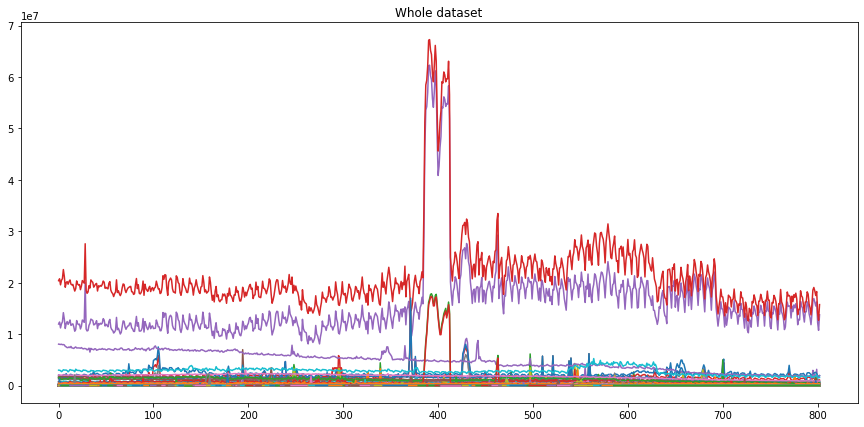

In [5]:
plt.figure(figsize=(15,7)) 
for i in range(X.shape[0]):
    plt.plot(X[i,:])
plt.title('Whole dataset')
plt.show() 

In [6]:
X_scaled = np.log(X + 1)
percentile = np.nanpercentile(X_scaled, 99) 
X_scaled = X_scaled / percentile

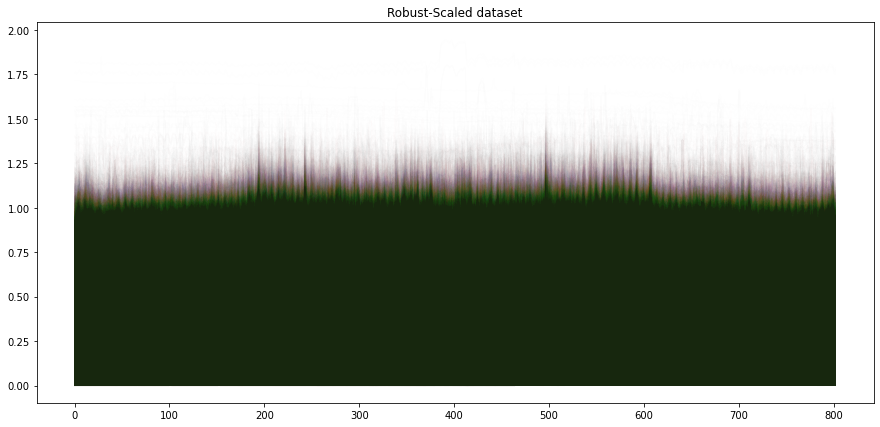

In [7]:
plt.figure(figsize=(15,7)) 
for i in range(X_scaled.shape[0]):
    plt.plot(X_scaled[i,:], alpha = 0.005)
plt.title('Robust-Scaled dataset')
plt.show() 

In [10]:
# Let's check some basic statistics
print('Mean:    ', np.nanmean(X_scaled))
print('St. dev.:', np.nanstd(X_scaled), '\n')
print('Min:     ', np.nanmin(X_scaled))
print('25th p.: ', np.nanpercentile(X_scaled, 25))
print('Median:  ', np.nanmedian(X_scaled))
print('75th p.: ', np.nanpercentile(X_scaled, 75))
print('Max:     ', np.nanmax(X_scaled)) 

Mean:     0.5158716475542303
St. dev.: 0.23735284804624013 

Min:      0.0
25th p.:  0.3231634002036986
Median:   0.5376045367493043
75th p.:  0.6982017232619114
Max:      1.944346724518173
